# Assignment 21
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. 



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import load_boston       #the data set is available in the sklearn python module

boston = load_boston()                         # loading data

bos = pd.DataFrame(boston.data)                # converting boston.data into a pandas data frame.

# STEP-1 : Understanding Data

In [3]:
bos.shape

(506, 13)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


The object boston is a dictionary, so we can explore the keys of this dictionary.

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos.columns = boston.feature_names         # replacing column names with feature names of boston data set.

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
print(boston.data[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [10]:
print(boston.target[:5])            # boston.target contains the housing prices

[24.  21.6 34.7 33.4 36.2]


In [11]:
bos['Price'] = boston.target        # adding target prices to the bos data frame

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We will fit a linear regression model and predict the Boston housing prices. We will use the least squares method as the way 
to estimate the coefficients

Y = boston housing price

X = all the other features (or independent variables)

We will import linear regression from sci-kit learn module and will drop the price column as we want only the parameters as 
our X values. We wil store linear regression object in a variable called lm.

In [13]:
from sklearn.linear_model import LinearRegression

X = bos.drop('Price', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Important functions to keep in mind while fitting a linear regression model are:

lm.fit()     -> fits a linear model

lm.predict() -> Predict Y using the linear model with estimated coefficients

lm.score()   -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the 
                model, as the proportion of total variation of outcomes explained by the model. 
    
.coef_  gives the coefficients 

.intercept_  gives the estimated intercepts.

In [14]:
lm.fit(X, bos.Price)                                                                # fitting a linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.4911032803606


In [16]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [17]:
lm.predict(X)[0:5]                                                                         # We will predict prices

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [18]:
new = pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','estimated coef'])  # using list as python 3 zip 
                                                                                           # returns an iterator
new

,features,estimated coef
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


We can see high corelation with RM.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BEA83B0>,
      dtype=object)

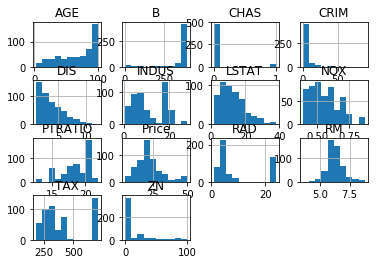

In [19]:
bos.hist()

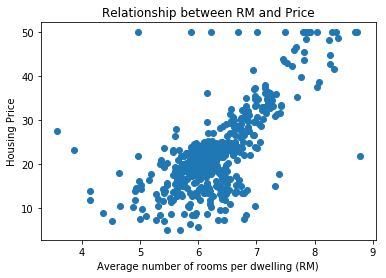

In [20]:
plt.scatter(bos.RM, bos.Price)
plt.ylabel("Housing Price")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.title("Relationship between RM and Price")
plt.show()

Text(0,0.5,'Predicted Prices')

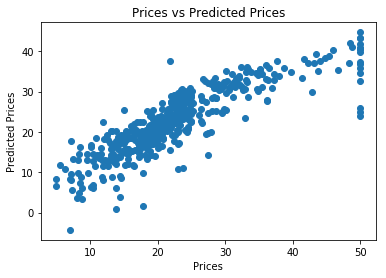

In [21]:
plt.scatter(bos.Price, lm.predict(X))        # comparing true prices and predicted prices

plt.title ('Prices vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')

We can see there is some error in prediction as housing prices increases. Lets calculate mean squared error

In [22]:
mseFull = np.mean((bos.Price - lm.predict(X)) **2)
print(mseFull)

21.897779217687493


But if we fit Linear Regresssion for one feature the error will be very high. Lets take a feature 'PTRATIO' and calculate 
mean squared error.

In [23]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
msePTRATIO = np.mean((bos.Price - lm.predict(X[['PTRATIO']])) **2)
msePTRATIO

62.65220001376924

The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.

# Step-2 : Training and validating data set
In practice we wont implement Linear Regression on the entire data set, we will have to split data set into training and test
data sets. So that we train our model on training data and see how well it performed on test sets.
We can create training and test data sets manually, but this is not the right way to do , because we may be training our 
model on less expensive houses and testing on expensive houses.

We have to divide our data sets randomly. Scikit learn provides a function called train_test_split to do this.


In [25]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.Price, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [26]:
# building a linear regression model using  the train/test data sets
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [27]:
# Calculating the mean squared error for training and test data

print("Fit a model X_train and calculate MSE with Y_train: ",np.mean((Y_train - lm.predict(X_train))**2))

print("Fit a model X_train and calculate MSE with X_test, Y_test:",np.mean((Y_test-lm.predict(X_test))**2))


Fit a model X_train and calculate MSE with Y_train:  19.546758473534666
Fit a model X_train and calculate MSE with X_test, Y_test: 28.541367275618896


Text(0,0.5,'Residuals')

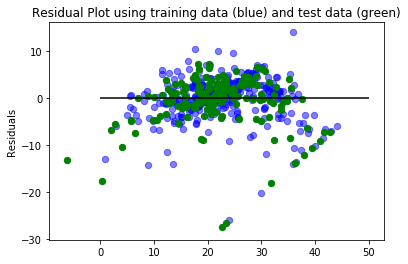

In [29]:
# Analyzing the Residual Plots
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training data (blue) and test data (green)')
plt.ylabel('Residuals')